# EXERCISES 1X JUAN IGNACIO CABALLERO


## LIBRARIES

In [2]:
import numpy as np
import skimage
from skimage.color import rgb2gray
from scipy import stats
import scipy
import pandas as pd
 

import importlib


from pathlib import Path
from PIL import Image

import matplotlib.pyplot as plt
import napari
from napari.utils import nbscreenshot
%gui qt5

In [27]:
# Function definitions
'''
Neighbours:
    It computes the neighbours of each pixel. Identifying each of them
    
    vec_array2d: Its the area of the image where the neighbours are computed
    
    vec_array2d has size factor of array2D size: 
    --> size(vec_array) es factor de size(array2d)
    
    The vec_array needs to be flattened to be an input.
    
    output: list of the each type of neighbour and the value of the pixels.
    When in an edge the result is nan
'''    
def neighbours(array2d, vec_array2d):
    vec_array2d_lf = []
    vec_array2d_rg = []
    vec_array2d_up = []
    vec_array2d_dw = []
 
 # Valores a la izda, derecha, arriba y abajo de cada pixel. Estan a una distancia periodica. 
    for i in range(len(vec_array2d)):
        if (i - array2d.shape[1])< 0:
            vec_array2d_lf.append(np.nan)  #Borde de imagen tienen nan
        else:
            vec_array2d_lf.append(vec_array2d[i - array2d.shape[1]])

    for i in range(len(vec_array2d)):
        if (i + array2d.shape[1])>= vec_array2d.size: # hay que restar 1 por empezar en 0
            vec_array2d_rg.append(np.nan)  #Borde de imagen tienen nan
        else:
            vec_array2d_rg.append(vec_array2d[i + array2d.shape[1]])

    for i in range(len(vec_array2d)):
        if i % array2d.shape[1] == 0:
            vec_array2d_up.append(np.nan)  #Borde de imagen tienen nan
        else:
            vec_array2d_up.append(vec_array2d[i - 1])

    for i in range(len(vec_array2d)):
        if i in np.arange(array2d.shape[1]-1, vec_array2d.size+array2d.shape[1], array2d.shape[1]):
            vec_array2d_dw.append(np.nan)  #Borde de imagen tienen nan
        else:
            vec_array2d_dw.append(vec_array2d.flatten('C')[i + 1])

    # Diagonales
    ##Miro los up y down de la columna a izda y derecha.
    diag_iz_up = []
    diag_iz_do = []
    diag_de_up = []
    diag_de_do = []

    for i in range(len(vec_array2d)):
        if ((pd.isnull(vec_array2d_lf[i])) or (pd.isnull(vec_array2d_up[i]))):
            diag_iz_up.append(np.nan)  #Borde de imagen tienen nan
        else:
            diag_iz_up.append(vec_array2d[i - array2d.shape[1]-1])
    for i in range(len(vec_array2d)):
        if i in np.arange(array2d.shape[1]-1,vec_array2d.size+array2d.shape[1],array2d.shape[1]) or ((i - array2d.shape[1]+1)<0):
            diag_iz_do.append(np.nan)  #Borde de imagen tienen nan
        else:
            diag_iz_do.append(vec_array2d[i - array2d.shape[1]+1])
    for i in range(len(vec_array2d)):
        if ((i + array2d.shape[1])>= vec_array2d.size) or (i % array2d.shape[1] == 0):
            diag_de_up.append(np.nan)  #Borde de imagen tienen nan
        else:
            diag_de_up.append(vec_array2d[i + array2d.shape[1]-1])
    for i in range(len(vec_array2d)):
        if ((i + array2d.shape[1])>= vec_array2d.size) or (i in np.arange(array2d.shape[1]-1, vec_array2d.size+array2d.shape[1], array2d.shape[1])): # hay que restar 1 por empezar en 0
            diag_de_do.append(np.nan)  #Borde de imagen tienen nan
        else:
            diag_de_do.append(vec_array2d[i + array2d.shape[1]+1])
    
    return (vec_array2d_lf,vec_array2d_rg,vec_array2d_up,vec_array2d_dw,diag_iz_up,diag_iz_do,diag_de_up,diag_de_do)

## EXERCISES

## 11a Flatzone
Implement a program that obtains the flat zone (pixels of the same value) of a pixel (ii,jj).

In [34]:
sample_img = np.array([[2,2,2,3],
                       [4,4,4,3],
                       [4,2,2,3],
                       [4,2,2,3]])
sample_img

array([[2, 2, 2, 3],
       [4, 4, 4, 3],
       [4, 2, 2, 3],
       [4, 2, 2, 3]])

### First approach
I leave the code in the cell just in case you are interested in checking it indeep. The procedure is encapsulated cells below

In [130]:
# ii,jj = 0,3
label = 1
n_pix = ii*sample_img.shape[1] + jj
v_pix = sample_img[ii,jj]

sample_out[ii,jj] = label
flatzone = []
flatzone.append(n_pix)
a_neighbours = np.array(neighbours(sample_img,sample_img.flatten()))
sample_out = np.zeros(sample_img.shape,dtype='int')
sample_out[ii,jj] = label

while flatzone:
    try:
        n_pix = flatzone.pop(-1)
        ii = np.int(n_pix / sample_img.shape[1])
        jj = n_pix - ii*sample_img.shape[1] 
        print('This is n_pix',n_pix)
        print('This is ii,jj',ii,jj)

        vec_array2d_up,vec_array2d_dw,vec_array2d_lf,vec_array2d_rg,diag_iz_up,diag_de_up,diag_iz_do,diag_de_do = a_neighbours[:,n_pix]
        # Checking if the neighbour have the same value
        if (vec_array2d_up == v_pix) & (sample_out[ii-1,jj] != label):
            sample_out[ii-1,jj] = label
            n_pix = jj + (ii-1)*sample_img.shape[1]
            flatzone.append(n_pix)
#         print('[f] up flatzone',flatzone)
        if (vec_array2d_dw == v_pix) & (sample_out[ii+1,jj] != label):
            sample_out[ii+1,jj] = label
            n_pix = jj + (ii+1)*sample_img.shape[1]
            flatzone.append(n_pix)
#         print('[f] down flatzone',flatzone)
        if (vec_array2d_lf == v_pix) & (sample_out[ii,jj-1] != label):
            sample_out[ii,jj-1] = label
            n_pix = jj-1 + (ii)*sample_img.shape[1]
            flatzone.append(n_pix)
#         print('[f] left flatzone',flatzone)
        if (vec_array2d_rg == v_pix) & (sample_out[ii,jj+1] != label):
            sample_out[ii,jj+1] = label
            n_pix = jj+1 + (ii)*sample_img.shape[1]
            flatzone.append(n_pix)
#         print('[f] right flatzone',flatzone)

        if (diag_iz_up == v_pix) & (sample_out[ii-1,jj-1] != label):
            sample_out[ii-1,jj-1] = label
            n_pix = jj-1 + (ii-1)*sample_img.shape[1]
            flatzone.append(n_pix)
#         print('[f] diag_iz_up flatzone',flatzone)    
        if (diag_de_up == v_pix) & (sample_out[ii-1,jj+1] != label):
            sample_out[ii-1,jj+1] = label
            n_pix = jj+1 + (ii-1)*sample_img.shape[1]
            flatzone.append(n_pix)
#         print('[f] diag_de_up flatzone',flatzone)    
        if (diag_iz_do == v_pix) & (sample_out[ii+1,jj-1] != label):
            sample_out[ii+1,jj-1] = label
            n_pix = jj-1 + (ii+1)*sample_img.shape[1]
            flatzone.append(n_pix)
#         print('[f] diag_iz_do flatzone',flatzone)    
        if (diag_de_do == v_pix) & (sample_out[ii+1,jj+1] != label):
            sample_out[ii+1,jj+1] = label
            n_pix = jj+1 + (ii+1)*sample_img.shape[1]
            flatzone.append(n_pix)
#         print('[f] diag_de_do flatzone',flatzone)    
    
    except Exception as exc:
#         print(exc)
        if exc == 'IndexError':
            continue        

This is n_pix 3
This is ii,jj 0 3
This is n_pix 7
This is ii,jj 1 3
This is n_pix 11
This is ii,jj 2 3
This is n_pix 15
This is ii,jj 3 3


In [128]:
sample_out

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

## Actual procedure

In [107]:
def get_flatzone(ii,jj,sample_image,label):
    n_pix = ii*sample_image.shape[1] + jj
    v_pix = sample_image[ii,jj]
    flatzone = []
    flatzone.append(n_pix)
    a_neighbours = np.array(neighbours(sample_image,sample_image.flatten())) ## I know this is not a good idea.
    sample_out = np.zeros(sample_image.shape,dtype='int')
    sample_out[ii,jj] = label

    while flatzone:
        try:
            n_pix = flatzone.pop(-1)
            ii = np.int(n_pix / sample_image.shape[1])
            jj = n_pix - ii*sample_image.shape[1] 
#             print('This is n_pix',n_pix)
#             print('This is ii,jj',ii,jj)

            vec_array2d_up,vec_array2d_dw,vec_array2d_lf,vec_array2d_rg,diag_iz_up,diag_de_up,diag_iz_do,diag_de_do = a_neighbours[:,n_pix]
            # Checking if the neighbour have the same value
            if (vec_array2d_up == v_pix) & (sample_out[ii-1,jj] != label):
                sample_out[ii-1,jj] = label
                n_pix = jj + (ii-1)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] up flatzone',flatzone)
            if (vec_array2d_dw == v_pix) & (sample_out[ii+1,jj] != label):
                sample_out[ii+1,jj] = label
                n_pix = jj + (ii+1)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] down flatzone',flatzone)
            if (vec_array2d_lf == v_pix) & (sample_out[ii,jj-1] != label):
                sample_out[ii,jj-1] = label
                n_pix = jj-1 + (ii)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] left flatzone',flatzone)
            if (vec_array2d_rg == v_pix) & (sample_out[ii,jj+1] != label):
                sample_out[ii,jj+1] = label
                n_pix = jj+1 + (ii)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] right flatzone',flatzone)

            if (diag_iz_up == v_pix) & (sample_out[ii-1,jj-1] != label):
                sample_out[ii-1,jj-1] = label
                n_pix = jj-1 + (ii-1)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] diag_iz_up flatzone',flatzone)    
            if (diag_de_up == v_pix) & (sample_out[ii-1,jj+1] != label):
                sample_out[ii-1,jj+1] = label
                n_pix = jj+1 + (ii-1)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] diag_de_up flatzone',flatzone)    
            if (diag_iz_do == v_pix) & (sample_out[ii+1,jj-1] != label):
                sample_out[ii+1,jj-1] = label
                n_pix = jj-1 + (ii+1)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] diag_iz_do flatzone',flatzone)    
            if (diag_de_do == v_pix) & (sample_out[ii+1,jj+1] != label):
                sample_out[ii+1,jj+1] = label
                n_pix = jj+1 + (ii+1)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] diag_de_do flatzone',flatzone)    

        except Exception as exc:
    #         print(exc)
            if exc == 'IndexError':
                continue
    
    return sample_out

In [142]:
ii,jj = 2,2
label = 1
get_flatzone(ii,jj,sample_img,label)


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0]])

### Checking

In [5]:
# This should adjust automatically the path i for the files 
ref_path = Path().resolve()
ref_path

WindowsPath('D:/OneDrive - Universidad Politécnica de Madrid/Z_Otros/Asignaturas/Procesamiento de imagenes/git_exercises_0-9')

In [11]:
# Declaring the paths to the folders of work

# Your path should be solved with this:
folder_to_read = Path(ref_path /  "python_folder")
print('This is your path to read the image',str(folder_to_read))

This is your path to read the image D:\OneDrive - Universidad Politécnica de Madrid\Z_Otros\Asignaturas\Procesamiento de imagenes\git_exercises_0-9\python_folder


In [12]:
## Name of the files
name2 = 'immed_gray_inv_20051218_frgr4_flatzone57_36.pgm'
name1 = 'immed_gray_inv_20051218_frgr4.pgm'

ruta_data1 = folder_to_read / name1
ruta_data2 = folder_to_read / name2

## Reading the image,
# this is a method to import the image in the python environment 
with Image.open(str(ruta_data1), mode='r') as img:
    img1 = np.array(img)
with Image.open(str(ruta_data2), mode='r') as img:
    img2 = np.array(img)


In [24]:
# Python starts at 0 and there is an axis transposition.
ii,jj = 35,56
label = 255
result = get_flatzone(ii,jj,img1,label)
(result == img2).all()

True

### Visualization

In [25]:
viewer = napari.view_image(img1)
viewer.add_image(img2)
viewer.add_image(result)

<Image layer 'result' at 0x23fef7c0dc8>

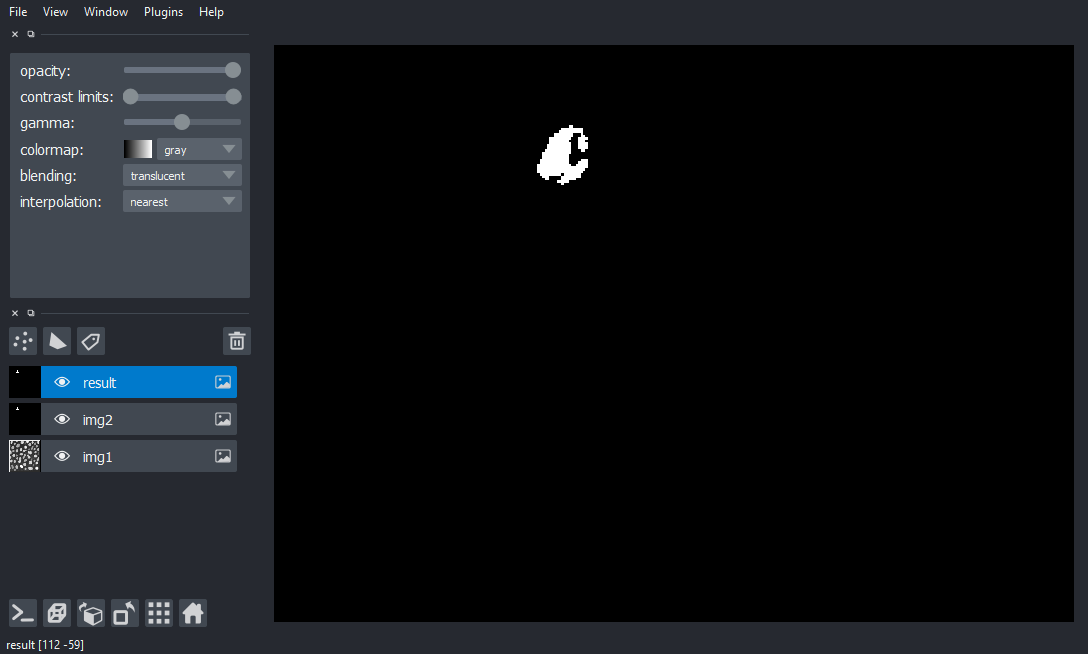

In [26]:
nbscreenshot(viewer)

## 12a Flatzones of an image
Implement a program that obtains the flat zone (pixels of the same value) of an image (ii,jj).

In [28]:
folder_to_read = Path(ref_path /  "python_folder")

In [108]:
## Name of the files
name3 = 'immed_gray_inv_20051218_thresh127.pgm'

ruta_data3 = folder_to_read / name3

## Reading the image,
# this is a method to import the image in the python environment 
with Image.open(str(ruta_data3), mode='r') as img:
    img3 = np.array(img)

In [109]:
background = 2

dummy_img1 = np.zeros(sample_img.shape,dtype='int') -1
label = 1
for ii in range(sample_img.shape[0]):
    for jj in range(sample_img.shape[1]):
        # Checking background
        if (sample_img[ii,jj] == background):
            dummy_img1[ii,jj] = 0
        if (sample_img[ii,jj] != background):
            print('coords',ii,jj)
            # Checking it is not labelled
            if (dummy_img1[ii,jj] == -1):
                label += 1
                print('this is label',label)
                dummy_img1 += get_flatzone(ii,jj,sample_img,label)
                print(dummy_img1)
dummy_img1

coords 0 3
this is label 2
[[ 0  0  0  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]]
coords 1 0
this is label 3
[[ 0  0  0  1]
 [ 2  2  2  1]
 [ 2 -1 -1  1]
 [ 2 -1 -1  1]]
coords 1 1
coords 1 2
coords 1 3
coords 2 0
coords 2 3
coords 3 0
coords 3 3


array([[0, 0, 0, 1],
       [2, 2, 2, 1],
       [2, 0, 0, 1],
       [2, 0, 0, 1]])

### Encapsulated functions

In [110]:

background = 2
def get_flatzone(ii,jj,sample_image,a_neighbours,label):
    n_pix = ii*sample_image.shape[1] + jj
    v_pix = sample_image[ii,jj]
    flatzone = []
    flatzone.append(n_pix)
#     a_neighbours = np.array(neighbours(sample_image,sample_image.flatten())) ## MODIFIED
    sample_out = np.zeros(sample_image.shape,dtype='int')
    sample_out[ii,jj] = label

    while flatzone:
        try:
            n_pix = flatzone.pop(-1)
            ii = np.int(n_pix / sample_image.shape[1])
            jj = n_pix - ii*sample_image.shape[1] 
#             print('This is n_pix',n_pix)
#             print('This is ii,jj',ii,jj)

            vec_array2d_up,vec_array2d_dw,vec_array2d_lf,vec_array2d_rg,diag_iz_up,diag_de_up,diag_iz_do,diag_de_do = a_neighbours[:,n_pix]
            # Checking if the neighbour have the same value
            if (vec_array2d_up == v_pix) & (sample_out[ii-1,jj] != label):
                sample_out[ii-1,jj] = label
                n_pix = jj + (ii-1)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] up flatzone',flatzone)
            if (vec_array2d_dw == v_pix) & (sample_out[ii+1,jj] != label):
                sample_out[ii+1,jj] = label
                n_pix = jj + (ii+1)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] down flatzone',flatzone)
            if (vec_array2d_lf == v_pix) & (sample_out[ii,jj-1] != label):
                sample_out[ii,jj-1] = label
                n_pix = jj-1 + (ii)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] left flatzone',flatzone)
            if (vec_array2d_rg == v_pix) & (sample_out[ii,jj+1] != label):
                sample_out[ii,jj+1] = label
                n_pix = jj+1 + (ii)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] right flatzone',flatzone)

            if (diag_iz_up == v_pix) & (sample_out[ii-1,jj-1] != label):
                sample_out[ii-1,jj-1] = label
                n_pix = jj-1 + (ii-1)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] diag_iz_up flatzone',flatzone)    
            if (diag_de_up == v_pix) & (sample_out[ii-1,jj+1] != label):
                sample_out[ii-1,jj+1] = label
                n_pix = jj+1 + (ii-1)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] diag_de_up flatzone',flatzone)    
            if (diag_iz_do == v_pix) & (sample_out[ii+1,jj-1] != label):
                sample_out[ii+1,jj-1] = label
                n_pix = jj-1 + (ii+1)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] diag_iz_do flatzone',flatzone)    
            if (diag_de_do == v_pix) & (sample_out[ii+1,jj+1] != label):
                sample_out[ii+1,jj+1] = label
                n_pix = jj+1 + (ii+1)*sample_image.shape[1]
                flatzone.append(n_pix)
    #         print('[f] diag_de_do flatzone',flatzone)    

        except Exception as exc:
    #         print(exc)
            if exc == 'IndexError':
                continue
    
    return sample_out

def get_labels(sample_image,background=0):
    a_neighbours = np.array(neighbours(sample_image,sample_image.flatten()))
    dummy_img1 = np.zeros(sample_image.shape,dtype='int') -1
    label = 1
    for ii in range(sample_image.shape[0]):
        for jj in range(sample_image.shape[1]):
            # Checking background
            if (sample_image[ii,jj] == background):
                dummy_img1[ii,jj] = 0
            if (sample_image[ii,jj] != background):
#                 print('coords',ii,jj)
                # Checking it is not labelled
                if (dummy_img1[ii,jj] == -1):
                    label += 1
#                     print('this is label',label)
                    dummy_img1 += get_flatzone(ii,jj,sample_image,a_neighbours,label)
#                     print(dummy_img1)
    return dummy_img1

In [111]:
get_labels(sample_img,2)

array([[0, 0, 0, 1],
       [2, 2, 2, 1],
       [2, 0, 0, 1],
       [2, 0, 0, 1]])

In [113]:
background = 0
labels = get_labels(img3,background)

viewer2 = napari.view_image(img3)
viewer2.add_image(labels)

<Image layer 'labels' at 0x23ff5b1eec8>

In [112]:
## Total number of regions 
# Remind python starts at 0. There 54 regions + background
np.max(result12a)

54

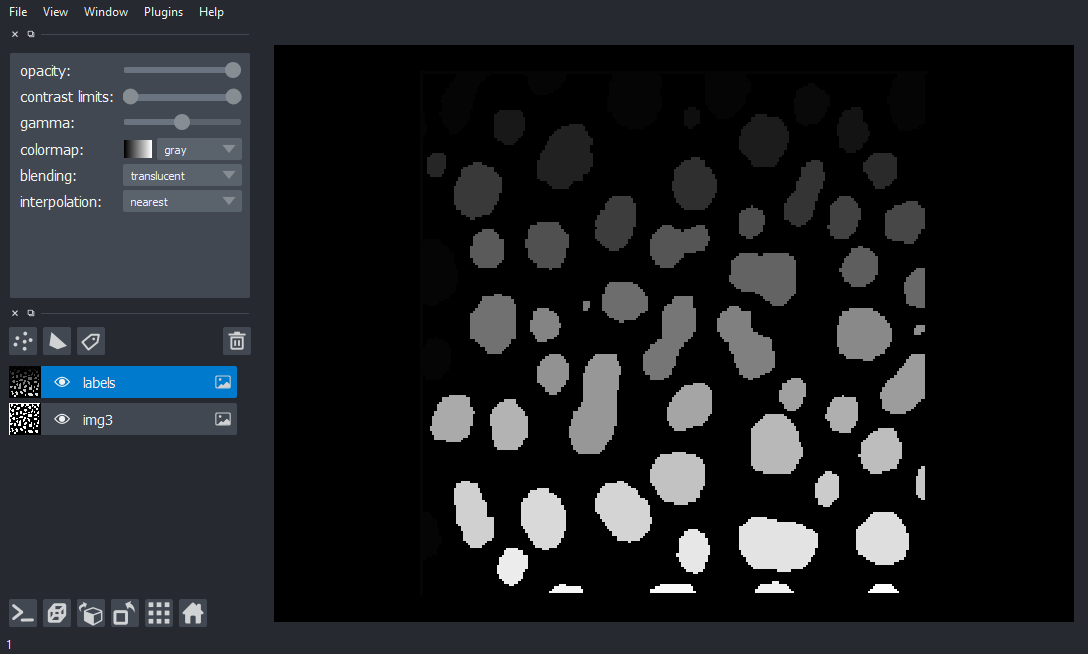

In [114]:
nbscreenshot(viewer2)